In [14]:
#importing libraries
import pandas as pd  # for dataframes and CSV operations
import numpy as np    # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns            # for advanced visualizations
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.ensemble import RandomForestRegressor  # Random Forest algorithm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [15]:
# loading the dataset
# Replace with the actual path or dataset link
df = pd.read_csv("diamonds.csv")
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [16]:
# checking for any missing values

df.isnull().sum()  # Check for missing values



Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [17]:
df.dropna(inplace=True)  # Drop if any

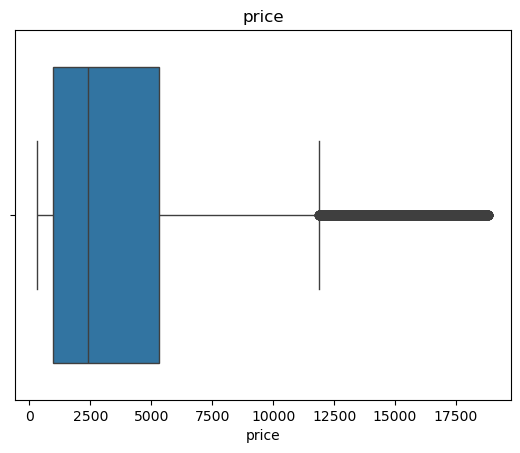

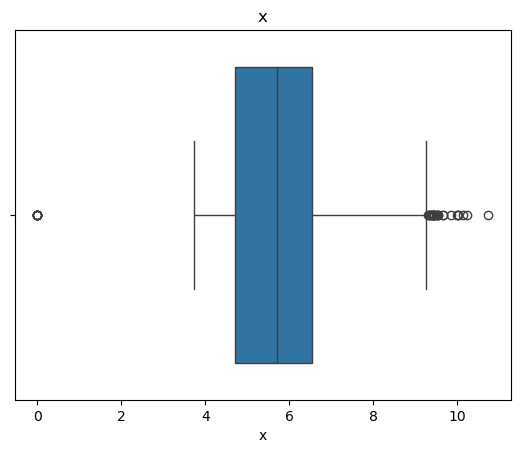

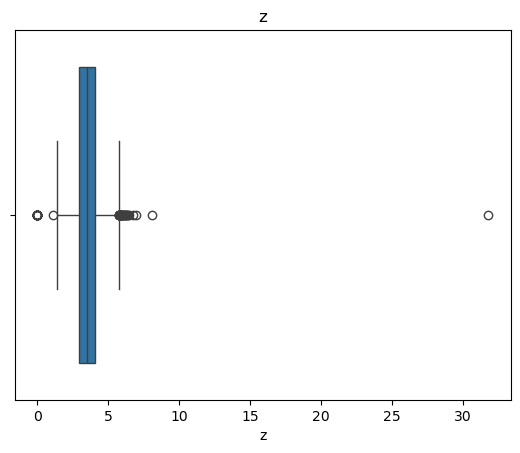

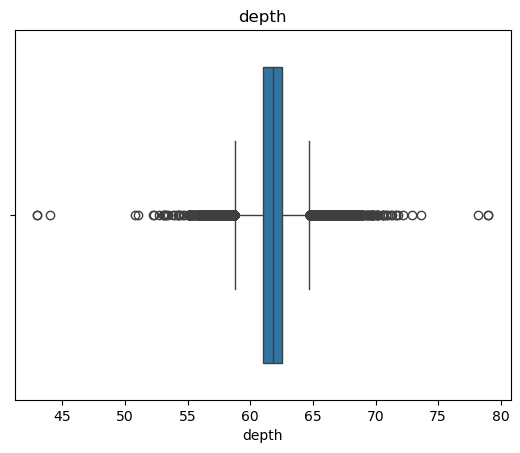

In [18]:
#Outlier Detection & Treatment

numeric_features = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']

# Boxplot for outliers
for col in numeric_features:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# Optional: Use IQR to filter extreme outliers
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [19]:
#3. Exploratory Data Analysis (EDA)

#3.1 Summary Statistics
df.describe()


Unnamed: 0         carat         depth         table         price  \
count  47524.000000  47524.000000  47524.000000  47524.000000  47524.000000   
mean   27206.946722      0.708700     61.786512     57.260186   3109.662381   
std    15989.963383      0.371104      1.105911      2.021552   2749.696633   
min        1.000000      0.200000     58.800000     52.000000    326.000000   
25%    12890.750000      0.380000     61.100000     56.000000    890.000000   
50%    29051.500000      0.600000     61.900000     57.000000   2061.000000   
75%    41283.250000      1.010000     62.500000     59.000000   4636.250000   
max    53940.000000      2.000000     64.700000     63.500000  11883.000000   

                  x             y             z  
count  47524.000000  47524.000000  47524.000000  
mean       5.546656      5.551478      3.428376  
std        0.979906      0.973990      0.606158  
min        3.730000      3.680000      1.410000  
25%        4.640000      4.650000      2.860000  
50%        5.440000      5.450000      3.360000  
75%        6.410000      6.410000      3.980000  
max        8.280000      8.270000      5.300000

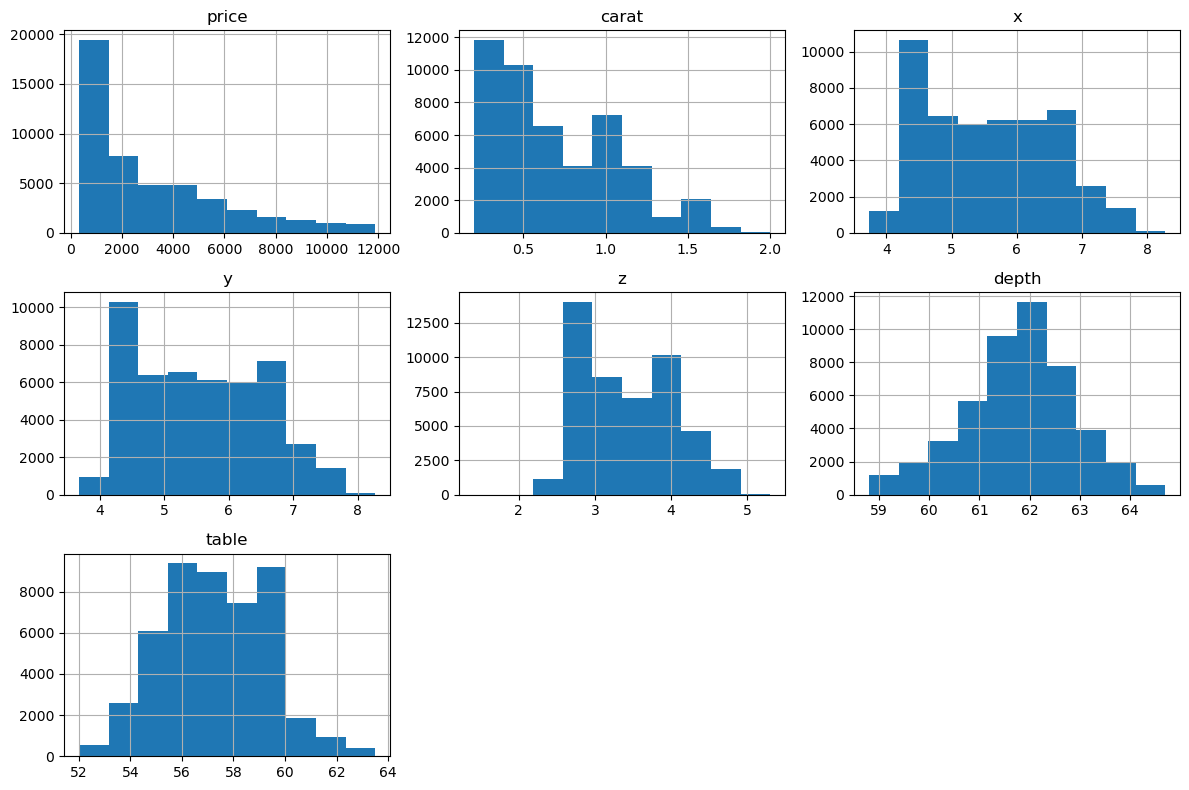

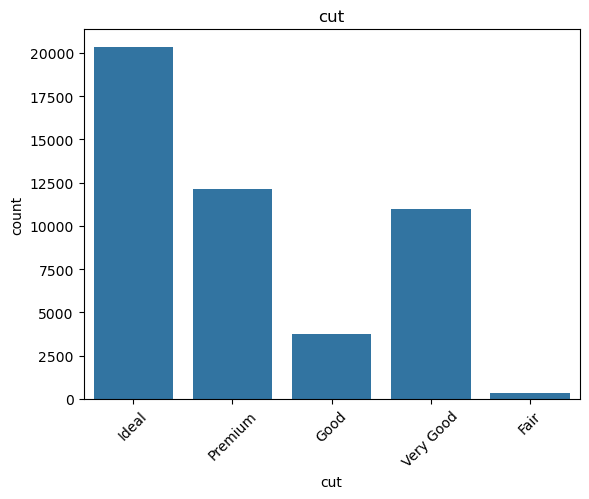

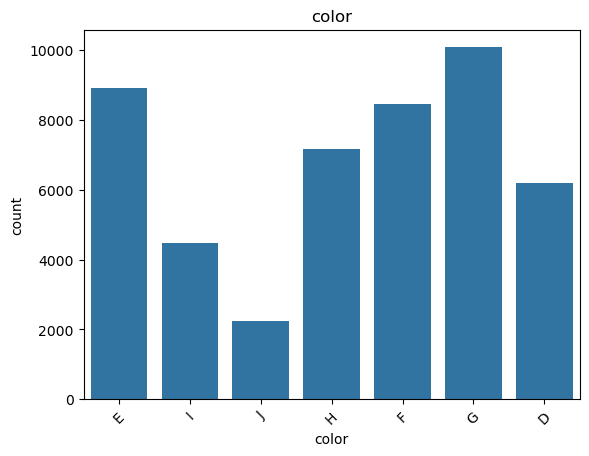

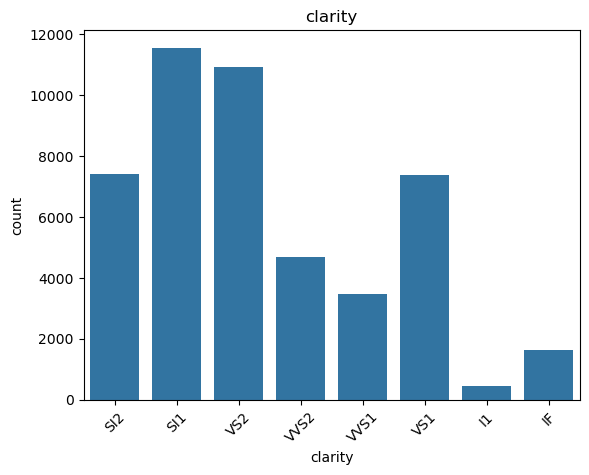

In [20]:
#3.2 Univariate & Bivariate Analysis
# Histograms
df[numeric_features].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Bar plots for categorical variables
categorical = ['cut', 'color', 'clarity']
for cat in categorical:
    sns.countplot(x=df[cat])
    plt.title(cat)
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Carat vs Price scatter plot
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Carat vs Price')
plt.show()


In [21]:
#4. Model Building
#4.1 Encoding Categorical Features
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)


In [22]:
#4.2 Data Scaling
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
#4.3 Split the Data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
#4.4 Train Random Forest Regressor


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [25]:
#4.5 Model Evaluation

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.9998626296176335
RMSE: 32.03302457002195
MAE: 3.2853066806943803
